# Начало работы с Tensorflow

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

/home/truename/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/truename/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/truename/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/truename/anaconda3/lib/python3.7/site-packages/tensorflow/python/frame

https://www.tensorflow.org/programmers_guide

<img src="tensors_flowing.gif"/>

# Подбираем коэффициенты полинома: y = w1 * x^2 + w2 * x + w3

## Задаем граф вычислений

In [2]:
# узлы в графе - тензоры, операции в графе задают связь между тензорами
# https://www.tensorflow.org/guide/graphs
graph = tf.Graph()

with graph.as_default():
    # с помощью tf.placeholder мы  
    # передаем данные из python в граф Tensorflow
    # первая позиция размерности задает число примеров в батче
    x = tf.placeholder(tf.float32, shape=[None], name='x')  # входное значение
    y = tf.placeholder(tf.float32, shape=[None], name='y')  # ожидаемый ответ
    
    # переменные позволяют сохранять значения в графе между вызовами
    # https://tensorflow.org/guide/variables
    with tf.variable_scope('coefficients') as scope:
        # создаем переменную для коэффициентов полинома
        w = tf.get_variable('w', initializer = tf.random_normal([3, 1], stddev=0.1))
    
    # вычисляем ответ для заданного x
    with tf.name_scope('prediction') as scope:
        poly = tf.stack([x**2, x, tf.ones_like(x)], axis=1, name='poly')
        y_pred = tf.matmul(poly, w)  # y_pred = w1 * x^2 + w2 * x + w3

Instructions for updating:
Colocations handled automatically by placer.


## Функция потерь и оптимизатор

In [3]:
# для подбора коэффициентов полинома используем оптимизатор
optimizer = tf.train.GradientDescentOptimizer(learning_rate=3e-4)

with graph.as_default():
    # минимизируем среднеквадратичное отклонение (MSE)
    with tf.name_scope('loss') as scope:
        mse_loss = tf.losses.mean_squared_error(y, y_pred[:, 0])
        
    # оптимизатор создает операцию обновления переменных графа
    train_step = optimizer.minimize(mse_loss)

Instructions for updating:
Use tf.cast instead.


## Обучение

In [4]:
# задаем коэффициенты
# полинома для генерации данных
POLY_COEFFS = [5, 7, 10]  

# генератор данных
def generate_data(batch_size=100):
    # y = w1 * x^2 + w2 * x + w3 + noise
    x = np.random.uniform(-10.0, 10.0, size=batch_size)
    poly = np.stack([x**2, x, np.ones_like(x)], axis=1)
    y = np.matmul(poly, POLY_COEFFS) + np.random.normal(size=batch_size)
    return x, y

In [5]:
loss_history = []

# граф выполняется в рамках сессии
# по завершении сесси текущие значения
# переменных перестают быть доступными
with tf.Session(graph=graph) as sess:
    # инициализируем переменные (параметры модели)
    sess.run(tf.global_variables_initializer())
    
    for i in range(10000):  # запускаем обучение
        # генерируем случайный набор данных
        # и выполняем операции на заданном семпле
        batch_x, batch_y = generate_data(batch_size=100)
        _, mse = sess.run([train_step, mse_loss],
                          feed_dict = {x: batch_x,
                                       y: batch_y})
        
        loss_history.append(mse)
        if (i + 1) % 100 == 0:
            print('MSE[%04d]: %.3f' % (i + 1, mse))

    # сравниваем подобранные веса с истинными значениями
    print('Real coeffs: %s' % POLY_COEFFS)
    print('Estimated coeffs: %s' % w.eval()[:, 0])      

MSE[0100]: 76.849
MSE[0200]: 40.348
MSE[0300]: 39.855
MSE[0400]: 31.397
MSE[0500]: 32.696
MSE[0600]: 29.628
MSE[0700]: 28.365
MSE[0800]: 26.892
MSE[0900]: 31.921
MSE[1000]: 24.616
MSE[1100]: 24.581
MSE[1200]: 21.869
MSE[1300]: 23.946
MSE[1400]: 20.957
MSE[1500]: 20.232
MSE[1600]: 18.588
MSE[1700]: 19.459
MSE[1800]: 18.022
MSE[1900]: 17.108
MSE[2000]: 16.758
MSE[2100]: 17.490
MSE[2200]: 15.083
MSE[2300]: 13.588
MSE[2400]: 13.851
MSE[2500]: 13.524
MSE[2600]: 11.559
MSE[2700]: 12.708
MSE[2800]: 10.046
MSE[2900]: 10.810
MSE[3000]: 10.236
MSE[3100]: 9.560
MSE[3200]: 7.508
MSE[3300]: 6.738
MSE[3400]: 9.189
MSE[3500]: 9.649
MSE[3600]: 7.375
MSE[3700]: 6.401
MSE[3800]: 6.304
MSE[3900]: 6.731
MSE[4000]: 6.252
MSE[4100]: 4.707
MSE[4200]: 5.387
MSE[4300]: 5.315
MSE[4400]: 5.418
MSE[4500]: 5.386
MSE[4600]: 3.921
MSE[4700]: 4.406
MSE[4800]: 4.478
MSE[4900]: 4.213
MSE[5000]: 3.974
MSE[5100]: 4.014
MSE[5200]: 4.302
MSE[5300]: 3.740
MSE[5400]: 3.273
MSE[5500]: 3.884
MSE[5600]: 3.356
MSE[5700]: 3.114
M

## Визуализируем кривую обучения

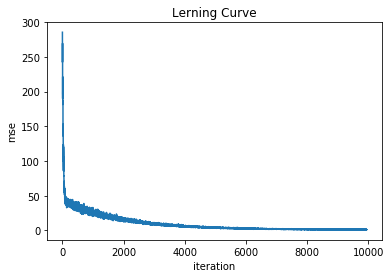

In [6]:
plt.plot(loss_history[50:])
plt.title('Lerning Сurve')
plt.xlabel('iteration')
plt.ylabel('mse');

## Визуализация графа вычислений

In [7]:
## удаляем логи предыдущих запусков
# !rm -rf ./log/001/*

In [8]:
with tf.Session(graph=graph) as sess:
    # сохраняем граф вычислений на диск
    writer = tf.summary.FileWriter('log/001', sess.graph)
    writer.close()

In [9]:
# запускаем интерфейс визуализации
!tensorboard --port 8800 --host 0.0.0.0 --logdir ./log/001

/home/truename/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/truename/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/truename/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/truename/anaconda3/lib/python3.7/site-packages/tensorflow/python/frame